In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

df = pd.read_csv(r"C:\Users\gebruiker\IH_LESSONS\Projects\labor_cost_da\Percentage_wage_cost_per_department.csv", index_col=0)
df.head()

,Wed 1 Jan 20,Thu 2 Jan 20,Fri 3 Jan 20,Sat 4 Jan 20,Sun 5 Jan 20,Mon 6 Jan 20,Tue 7 Jan 20,Wed 8 Jan 20,Thu 9 Jan 20,Fri 10 Jan 20,...,Sun 8 Jun 25,Mon 9 Jun 25,Tue 10 Jun 25,Wed 11 Jun 25,Thu 12 Jun 25,Fri 13 Jun 25,Sat 14 Jun 25,Average,Last year,Cummulative
Bediening,17,9,15,12,11,12,18,17,17,15,...,14,19,15,18,13,13,18,11,11,11
Facilitair,0,0,0,0,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
Facilitair,0,0,0,0,0,2,2,2,1,0,...,0,0,0,0,0,0,1,0,0,0
Keuken,12,8,8,9,9,11,14,13,12,9,...,11,12,10,10,8,10,23,15,15,15
Management,0,0,0,0,1,0,0,6,0,0,...,1,1,0,0,0,0,0,1,1,1


In [5]:
df = df.T
df = df.reset_index()
df.rename(columns={'index': 'date'}, inplace=True)
df.head()

,date,Bediening,Facilitair,Facilitair,Keuken,Management,Spoelkeuken,Total
0,Wed 1 Jan 20,17,0,0,12,0,3,31
1,Thu 2 Jan 20,9,0,0,8,0,2,20
2,Fri 3 Jan 20,15,0,0,8,0,2,26
3,Sat 4 Jan 20,12,0,0,9,0,2,23
4,Sun 5 Jan 20,11,0,0,9,1,2,24


In [7]:
print(df.columns.tolist())

['date', 'Bediening', 'Facilitair', 'Facilitair', 'Keuken', 'Management', 'Spoelkeuken', 'Total']


In [9]:
df.reset_index(drop=True, inplace=True)
df.head()

,date,Bediening,Facilitair,Facilitair,Keuken,Management,Spoelkeuken,Total
0,Wed 1 Jan 20,17,0,0,12,0,3,31
1,Thu 2 Jan 20,9,0,0,8,0,2,20
2,Fri 3 Jan 20,15,0,0,8,0,2,26
3,Sat 4 Jan 20,12,0,0,9,0,2,23
4,Sun 5 Jan 20,11,0,0,9,1,2,24


In [11]:
df.drop(columns=['Facilitair','Management'], inplace=True)
df.head()

,date,Bediening,Keuken,Spoelkeuken,Total
0,Wed 1 Jan 20,17,12,3,31
1,Thu 2 Jan 20,9,8,2,20
2,Fri 3 Jan 20,15,8,2,26
3,Sat 4 Jan 20,12,9,2,23
4,Sun 5 Jan 20,11,9,2,24


In [13]:
df.rename(columns={
    'Bediening': 'service',
    'Keuken': 'kitchen',
    'Spoelkeuken': 'dishwasher'
}, inplace=True)
df.head()

,date,service,kitchen,dishwasher,Total
0,Wed 1 Jan 20,17,12,3,31
1,Thu 2 Jan 20,9,8,2,20
2,Fri 3 Jan 20,15,8,2,26
3,Sat 4 Jan 20,12,9,2,23
4,Sun 5 Jan 20,11,9,2,24


In [15]:
# Retrieving the number of rows and columns in the dataframe
df.shape

(1995, 5)

In [17]:
# Displaying the data types of each column in the dataframe
df.dtypes

date          object
service        int64
kitchen        int64
dishwasher     int64
Total          int64
dtype: object

In [19]:
# Convert to datetime, ignoring errors
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Now, 'date' is of type datetime64[ns]
print(df['date'].dtype)
print(df.head())

datetime64[ns]
        date  service  kitchen  dishwasher  Total
0 2020-01-01       17       12           3     31
1 2020-01-02        9        8           2     20
2 2020-01-03       15        8           2     26
3 2020-01-04       12        9           2     23
4 2020-01-05       11        9           2     24


In [21]:
# Displaying the data types of each column in the dataframe
df.dtypes

date          datetime64[ns]
service                int64
kitchen                int64
dishwasher             int64
Total                  int64
dtype: object

In [23]:
df.head()

,date,service,kitchen,dishwasher,Total
0,2020-01-01,17,12,3,31
1,2020-01-02,9,8,2,20
2,2020-01-03,15,8,2,26
3,2020-01-04,12,9,2,23
4,2020-01-05,11,9,2,24


In [25]:
# Check original dtype
print("Original dtype:", df['date'].dtype)

# Convert to datetime, coercing errors
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Verify conversion
print("Converted dtype:", df['date'].dtype)

# Format as string in day/month/year
df['date'] = df['date'].dt.strftime('%d/%m/%Y')

# Display first few rows
print(df.head())

Original dtype: datetime64[ns]
Converted dtype: datetime64[ns]
         date  service  kitchen  dishwasher  Total
0  01/01/2020       17       12           3     31
1  02/01/2020        9        8           2     20
2  03/01/2020       15        8           2     26
3  04/01/2020       12        9           2     23
4  05/01/2020       11        9           2     24


In [27]:
# Retrieving the unique data types present in the dataframe columns
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('O')]

In [29]:
# Extracting column names with numerical data types from the dataframe
df.select_dtypes("number").columns

Index(['service', 'kitchen', 'dishwasher', 'Total'], dtype='object')

In [31]:
# Counting and sorting the unique values for each numerical column in descending order
df.select_dtypes("number").nunique().sort_values(ascending=False)

Total         174
kitchen        96
dishwasher     63
service        39
dtype: int64

In [33]:
# Retrieving column names with object (typically string) data types from the dataframe
df.select_dtypes("object").columns

Index(['date'], dtype='object')

In [35]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

date          3
service       0
kitchen       0
dishwasher    0
Total         0
dtype: int64

In [37]:
df.style.highlight_null(color='yellow')

,date,service,kitchen,dishwasher,Total
0,01/01/2020,17,12,3,31
1,02/01/2020,9,8,2,20
2,03/01/2020,15,8,2,26
3,04/01/2020,12,9,2,23
4,05/01/2020,11,9,2,24
5,06/01/2020,12,11,4,29
6,07/01/2020,18,14,4,38
7,08/01/2020,17,13,5,43
8,09/01/2020,17,12,4,34
9,10/01/2020,15,9,3,27


In [39]:
#Drop missing value
df = df.drop(df.index[1978:1995])

In [41]:
# Checking again for missing data
df.isnull().sum().sort_values(ascending=False)

date          0
service       0
kitchen       0
dishwasher    0
Total         0
dtype: int64

In [43]:
# Summary statistics for the dataset
#df.describe(include = "object").T
df.describe().T

,count,mean,std,min,25%,50%,75%,max
service,1978.0,10.384226,8.946251,0.0,7.0,11.0,13.0,239.0
kitchen,1978.0,15.581901,43.969786,0.0,6.0,8.0,10.0,533.0
dishwasher,1978.0,7.801820,24.936625,0.0,2.0,4.0,5.0,266.0
Total,1978.0,34.415066,57.584071,-781.0,18.0,24.0,31.0,571.0


In [45]:
#Measures of Centrality
mean_total_percentage = df['Total'].mean()
median_total_percentage = df['Total'].median()
mode_total_percentage = df['Total'].mode()[0]

print(f"Mean of Total: {mean_total_percentage}")
print(f"Median of Total: {median_total_percentage}")
print(f"Mode of Total: {mode_total_percentage}")

Mean of Total: 34.41506572295248
Median of Total: 24.0
Mode of Total: 0


In [47]:
#Measures of Dispersion
variance_total_percentage = df['Total'].var()
std_dev_total_percentage = df['Total'].std()
min_total_percentage = df['Total'].min()
max_total_percentage = df['Total'].max()
range_total_percentage = max_total_percentage - min_total_percentage
quantiles_total_percentage = df['Total'].quantile([0.25, 0.5, 0.75])

print(f"Variance of Total: {variance_total_percentage}")
print(f"Standard Deviation of Total: {std_dev_total_percentage}")
print(f"Minimum of Total: {min_total_percentage}")
print(f"Maximum of total: {max_total_percentage}")
print(f"Range of Total: {range_total_percentage}")
print("Quantiles of Total:")
print(quantiles_total_percentage)

Variance of Total: 3315.9252559643137
Standard Deviation of Total: 57.58407119997955
Minimum of Total: -781
Maximum of total: 571
Range of Total: 1352
Quantiles of Total:
0.25    18.0
0.50    24.0
0.75    31.0
Name: Total, dtype: float64


In [49]:
**Shape of the Distribution**

#Skewness and kurtosis provide insights into the shape of the data distribution. Skewness indicates the asymmetry, and kurtosis tells us about the "tailedness" or how peaked the distribution is.

SyntaxError: invalid syntax (886610731.py, line 1)

In [51]:
skewness_total = df['Total'].skew()
kurtosis_total = df['Total'].kurtosis()

print(f"Skewness of Total: {skewness_total}")
print(f"Kurtosis of Total: {kurtosis_total}")

Skewness of Total: 2.720141336627219
Kurtosis of Total: 43.98885624692768


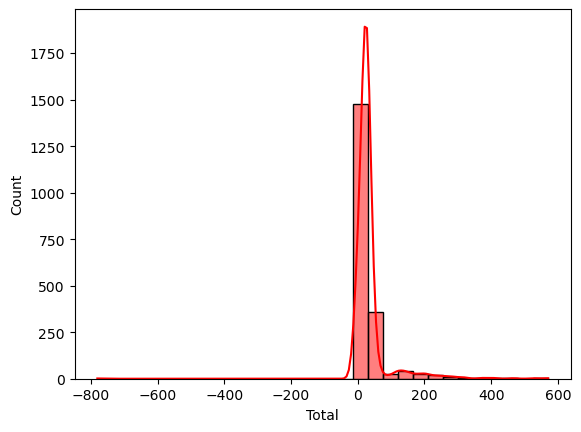

In [53]:
# Plotting a histogram for the 'SalePrice' column of the 'data' dataframe
# 'kde=True' adds a Kernel Density Estimate plot to give an approximation of the data's distribution
# 'bins=30' divides the data into 30 bins for more detailed granularity
# 'color="salmon"' sets the color of the bars to salmon
sns.histplot(df['Total'], kde=True, bins=30, color="red")
plt.show()

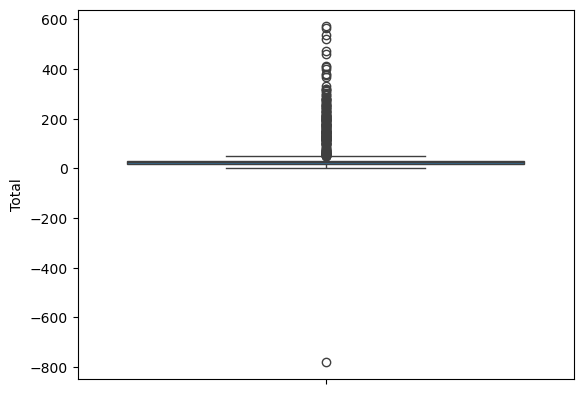

In [55]:
# Plotting a boxplot for the 'SalePrice' column with a light blue color
sns.boxplot(data = df['Total'])#, color="lightblue")
plt.show()